# DataCamp Certification Case Study

### Project Brief

You are on the data science team for a coffee company that is looking to expand their business into Ukraine. They want to get an understanding of the existing coffee shop market there.

You have a dataset from Google businesses. It contains information about coffee shops in Ukraine. The marketing manager wants to identify the key coffee shop segments. They will use this to construct their marketing plan. In their current location, they split the market into 5 segments. The marketing manager wants to know how many segments are in this new market, and their key features.

You will be presenting your findings to the Marketing Manager, who has no data science background.

The data you will use for this analysis can be accessed here: `"data/coffee_shops.csv"`

# Required Tools
| Library | Description |
| ----------- | ----------- |
| [numpy](https://numpy.org) | adding support for large, multi-dimensional arrays and matrices |
| [pandas](https://pandas.pydata.org) | for data manipulation and analysis. |
| [sciket-learn](https://scikit-learn.org) | it features various classification, regression and clustering algorithms including support vector machines|
| [matplotlib](https://matplotlib.org) & [seaborn](https://seaborn.pydata.org)| is a plotting library |


# 1. Analysis Plan
The analysis plan is to answer the questions.
1. What kinds of services do these coffee shops provide in Ukraine?
2. In the cluster with higher ratings and reviews, what services do the coffee places provide?
3. Where are the coffee shops located?


# 2. Dataset
The data contains 200 rows and 9 columns. The columns are as below.
* Region: Character, one of 10 possible regions where coffee shop is located
* Place name: Character, name of the shop
* Place type: Character, the type of coffee shop (e.g., “Cafe”, “Espresso Bar”...)
* Rating: Numeric, coffee shop rating (on a 5 point scale)
* Reviews: Numeric, number of reviews provided for the shop
* Price: Character, price category (e.g., $, $$)
* Delivery option: True/False, describing, whether there is (or isn’t) a delivery option
* Dine in option: Column describing whether there is (True) or isn’t (missing) a dine-in option
* Takeout option: Column describing whether there is (True) or isn’t (missing) a takeout option

**Target**:  identify the key coffee shops in Ukraine in order to build up the next marketing plans.

# 3. Analysis Proccess

## 3.1 Data Pre-proccessing
This section also involves data cleansing with an exploratory data analysis.





In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
data = pd.read_csv('data/coffee_shops.csv')

# display  5 observasions
data.sample(n=5)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
185,Dnipro,Horizontal kaffee,Cafe,5.0,37.0,NaN,False,True,NaN
145,Kiev,Cuba Coffee Brew - Bar,Espresso bar,4.6,693.0,$$,False,True,True
173,Kharkiv,Sweeter,Coffee shop,4.6,289.0,$$,False,True,True
123,Khrivoy Rog,Кофейня My Coffee,Cafe,4.5,124.0,$$,False,NaN,True
138,Khrivoy Rog,The Spiceroom,Cafe,4.6,38.0,NaN,True,NaN,True


In [77]:
data.shape # display (how many rows, how many columns)

(200, 9)

In [78]:
Data_dict = pd.DataFrame(data.dtypes)
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict['Missing Values'] = data.isnull().sum()
Data_dict['Unique Values'] = data.nunique()


Data_dict

,DataType,Missing Values,Unique Values
Region,object,0,10
Place name,object,0,187
Place type,object,0,14
Rating,float64,2,12
Reviews,float64,2,163
Price,object,78,3
Delivery option,object,71,2
Dine in option,object,60,1
Takeout option,object,56,1


* Because of few missing values in the Rating and Reviews columns, replacing the missing values with average numbers is an idea.

In [79]:
#replace the missing values by average numbers for Rating and Reviews columns
data['Rating'] = data['Rating'].fillna(data['Rating'].mean())
data['Reviews'] = data['Reviews'].fillna(data['Reviews'].mean())

# display data dictionary after pre-proccessing
Data_dict['Missing Values'] = data.isnull().sum()
Data_dict 

,DataType,Missing Values,Unique Values
Region,object,0,10
Place name,object,0,187
Place type,object,0,14
Rating,float64,0,12
Reviews,float64,0,163
Price,object,78,3
Delivery option,object,71,2
Dine in option,object,60,1
Takeout option,object,56,1


In [80]:
na_list = ['Price', 'Delivery option', 'Dine in option', 'Takeout option']

for na in na_list:
    counts = data[na].value_counts()
    print('{}\n{}\n'.format(na, counts))

Price
$$     116
$$$      4
$        2
Name: Price, dtype: int64

Delivery option
False    94
True     35
Name: Delivery option, dtype: int64

Dine in option
True    140
Name: Dine in option, dtype: int64

Takeout option
True    144
Name: Takeout option, dtype: int64



* As for the price, most values are either $$ or missing values, so removing the price column should be fine because it does not provide enough information

* Regarding the dine-in and takeout services, the variables in these columns are either "True" and missing values. Thus, it is obvious that the missing values should be "False," which means the shops do not provide dine-in or takeout options.

* Lastly, since the missing values in the Delivery column are neither "True" nor "False," this analysis replace the missing values with "unknown."

In [81]:
data = data.drop('Price', axis=1)
data['Dine in option'] = data['Dine in option'].fillna('False')
data['Takeout option'] = data['Takeout option'].fillna('False')
data['Delivery option'] = data['Delivery option'].fillna('unknown')

# display data dictionary after pre-proccessing
Data_dict['Missing Values'] = data.isnull().sum()
Data_dict 

,DataType,Missing Values,Unique Values
Region,object,0.0,10
Place name,object,0.0,187
Place type,object,0.0,14
Rating,float64,0.0,12
Reviews,float64,0.0,163
Price,object,NaN,3
Delivery option,object,0.0,2
Dine in option,object,0.0,1
Takeout option,object,0.0,1


In [82]:
#change the variable type in the Reviews columns to integer
data['Reviews'] = data['Reviews'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    int64  
 5   Delivery option  200 non-null    object 
 6   Dine in option   200 non-null    object 
 7   Takeout option   200 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 12.6+ KB


In [83]:
#review the number of shops in different regions
data.groupby('Region')['Place name'].count()


Region
Dnipro         20
Kharkiv        20
Kherson        20
Khrivoy Rog    20
Kiev           20
Lviv           20
Mariupol       20
Odessa         20
Poltava        20
Zaporozhye     20
Name: Place name, dtype: int64

In [84]:
#chech whether there is a duplicated value in the Place Name column
data.groupby('Region')['Place name'].nunique()

Region
Dnipro         20
Kharkiv        18
Kherson        20
Khrivoy Rog    19
Kiev           19
Lviv           18
Mariupol       20
Odessa         20
Poltava        20
Zaporozhye     20
Name: Place name, dtype: int64

It seems there are some franchise coffee shops in this dataset. They have the same name in different regions, or some of them are in the same regions. However, it is acceptable since they are different shops providing different services. This analysis will keep these duplicated place names.

In [85]:
data[data['Place name'].duplicated(keep=False)]

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
23,Poltava,Coffee House,Cafe,4.7,329,False,False,True
45,Kherson,coffee House,Coffee shop,4.7,279,False,True,True
66,Zaporozhye,Dim Kavy,Espresso bar,4.8,118,unknown,False,False
68,Zaporozhye,Coffee House,Store,4.7,132,unknown,False,False
71,Zaporozhye,MY COFFEE,Coffee shop,4.5,341,False,True,True
97,Odessa,MY COFFEE,Coffee shop,4.8,150,False,True,True
100,Lviv,Lviv Coffee Manufacture,Coffee shop,4.7,17937,True,True,True
101,Lviv,Svit Kavy,Coffee shop,4.6,2931,unknown,True,True
107,Lviv,Svit Kavy,Coffee shop,4.3,102,unknown,True,True
108,Lviv,Lviv Coffee Manufacture,Coffee shop,4.5,778,False,True,True


Lastly, change the letters in the Place name and Place type columns into lower cases in order to avoid any categorical issue.

In [86]:
data['Place name'] = data['Place name'].str.lower()
data['Place type'] = data['Place type'].str.lower()
data.head()

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
0,Mariupol,dim kavu,coffee store,4.6,206,unknown,False,False
1,Mariupol,коферум,cafe,5.0,24,False,False,True
2,Mariupol,кофейня світ чаю,coffee shop,5.0,11,unknown,False,True
3,Mariupol,кофейня starcoff,coffee shop,4.4,331,False,True,True
4,Mariupol,"кофейня ""friend zone""",coffee shop,5.0,12,unknown,True,True


## 3.2 EDA (Exploratory Data Analysis)
An EDA (Exploratory Data Analysis) will help understand the main characteristics of the dataset. Further analysis would be based on the findings explored from the EDA.



In [87]:
#define categorical columns and numeric columns
cat_columns = ['Place type', 'Delivery option', 'Dine in option', 'Takeout option']
num_columns = ['Rating', 'Reviews']

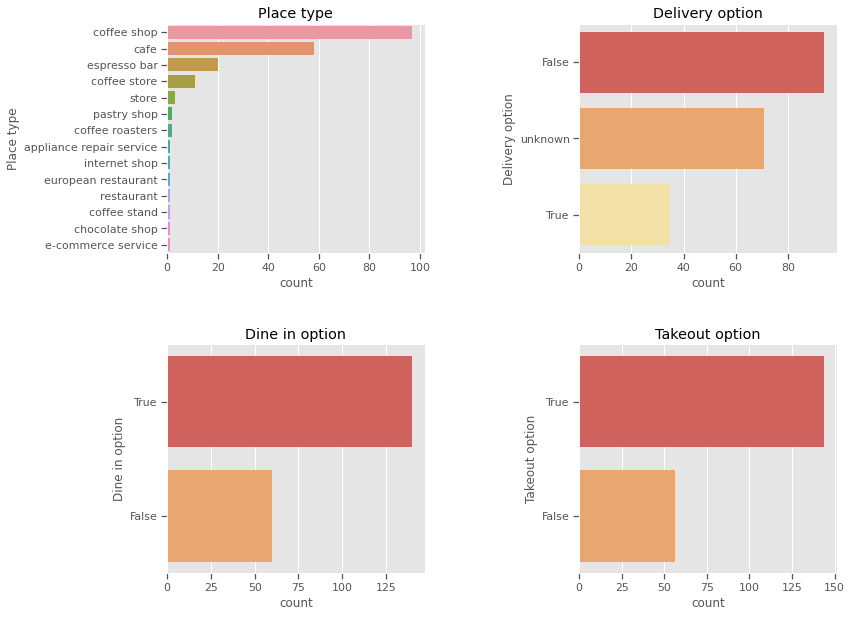

In [88]:
#bar plots to see the value distributions in differnet columns
plt.figure(figsize=(12,16))
sns.set_context("notebook")
plt.style.use('ggplot') 
plt.subplots_adjust(hspace=0.4, wspace=0.6)
sns.set_palette("Spectral")
for i, cat_col in enumerate(cat_columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=cat_col, data=data, 
                  order=data[cat_col].value_counts().index)
    plt.title(cat_col)
    plt.xticks(rotation=0)
plt.show()

Reagarding the plots above, most places are coffee shops. Most of them do not have a delivery service but have dine-in and take-out options.

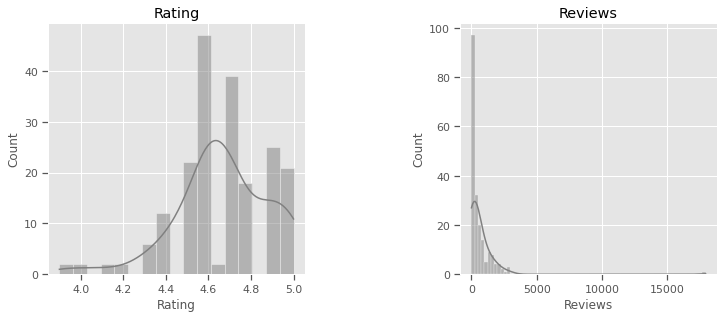

In [89]:
#histogram to see the distributions in Rating and Reviews columns
plt.figure(figsize=(12,12))
plt.subplots_adjust(hspace=0.6, wspace=0.6)
for i, num_col in enumerate(num_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[num_col], color='grey', kde=True)
    plt.title(num_col)
plt.show()

Most shops have around 4 rating scores. As for the reviews column, it is highly skewed. It seems there are some outliners having super high reviews. Thus, this analysis would like to review whether the outliners are suitable to be kept.

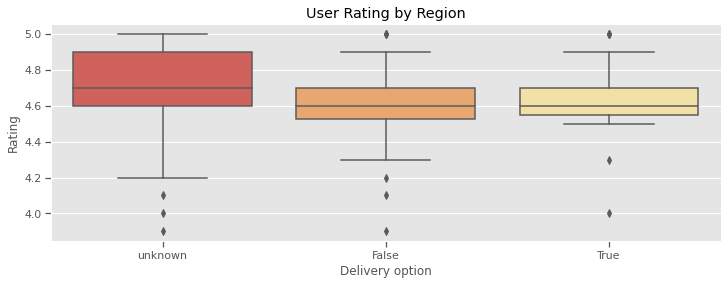

In [90]:
plt.figure(figsize=(12,4))
sns.boxplot(x='Delivery option', y='Rating', data=data)
plt.xlabel('Delivery option')
plt.ylabel('Rating')
plt.title('User Rating by Region')
plt.show()


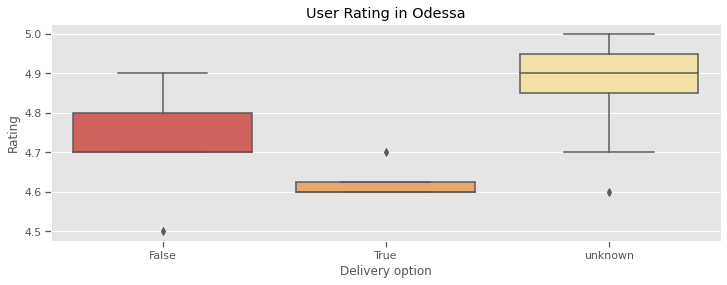

In [91]:
plt.figure(figsize=(12,4))
sns.boxplot(x='Delivery option', y='Rating', data=data[data['Region'] == 'Odessa'])
plt.xlabel('Delivery option')
plt.ylabel('Rating')
plt.title('User Rating in Odessa')
plt.show()


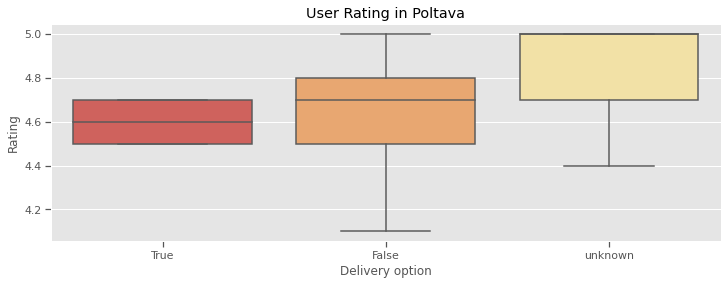

In [92]:
plt.figure(figsize=(12,4))
sns.boxplot(x='Delivery option', y='Rating', data=data[data['Region'] == 'Poltava'])
plt.xlabel('Delivery option')
plt.ylabel('Rating')
plt.title('User Rating in Poltava')
plt.show()


A general look it seems that delivery option does not matter, However Closer look in some Regions (i.e Odessa, Poltava) With delivery rate businesses get lower user ratings. This can be an business opportunity

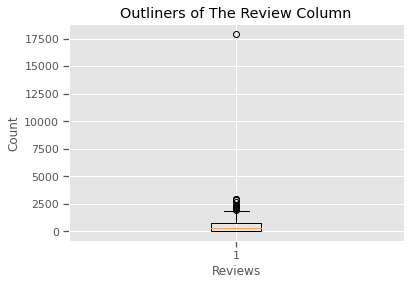

In [93]:
plt.boxplot(data['Reviews'])
plt.xlabel('Reviews')
plt.ylabel('Count')
plt.title('Outliners of The Review Column')
plt.show()

In [94]:
review_top = data['Reviews'].mean()+data['Reviews'].std()*3
data[data['Reviews'] > review_top]

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
100,Lviv,lviv coffee manufacture,coffee shop,4.7,17937,True,True,True


It looks the place is a coffee manufacturer who would not be a huge concern if this analysis drops this shop. Although we might want to review this shop in the future, we can still evaluate it individually. It would be better to drop it for further analysis. Otherwise, it would cause issues when clustering.

In [95]:
#drop the outliner
data_dropone = data.drop(100, axis=0)
data_dropone

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
0,Mariupol,dim kavu,coffee store,4.6,206,unknown,False,False
1,Mariupol,коферум,cafe,5.0,24,False,False,True
2,Mariupol,кофейня світ чаю,coffee shop,5.0,11,unknown,False,True
3,Mariupol,кофейня starcoff,coffee shop,4.4,331,False,True,True
4,Mariupol,"кофейня ""friend zone""",coffee shop,5.0,12,unknown,True,True
...,...,...,...,...,...,...,...,...
195,Dnipro,artist,restaurant,4.6,963,unknown,True,True
196,Dnipro,dream cafe,cafe,4.3,646,False,True,True
197,Dnipro,рута кафе пп куліченко к.і.,cafe,4.6,16,False,True,True
198,Dnipro,ob'yektna kava,coffee shop,4.7,599,unknown,True,True


In [96]:
data_dropone.reset_index(drop=True)

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option
0,Mariupol,dim kavu,coffee store,4.6,206,unknown,False,False
1,Mariupol,коферум,cafe,5.0,24,False,False,True
2,Mariupol,кофейня світ чаю,coffee shop,5.0,11,unknown,False,True
3,Mariupol,кофейня starcoff,coffee shop,4.4,331,False,True,True
4,Mariupol,"кофейня ""friend zone""",coffee shop,5.0,12,unknown,True,True
...,...,...,...,...,...,...,...,...
194,Dnipro,artist,restaurant,4.6,963,unknown,True,True
195,Dnipro,dream cafe,cafe,4.3,646,False,True,True
196,Dnipro,рута кафе пп куліченко к.і.,cafe,4.6,16,False,True,True
197,Dnipro,ob'yektna kava,coffee shop,4.7,599,unknown,True,True


In [97]:
#group shops by regions and get the average numbers of the ratings and reviews
region_grouped = data_dropone.groupby('Region')[num_columns].mean().round(2)
region_grouped

,Rating,Reviews
Region,,
Dnipro,4.55,591.55
Kharkiv,4.58,544.45
Kherson,4.64,382.75
Khrivoy Rog,4.60,461.90
Kiev,4.78,764.60
Lviv,4.67,1096.63
Mariupol,4.70,193.80
Odessa,4.78,422.00
Poltava,4.65,535.25


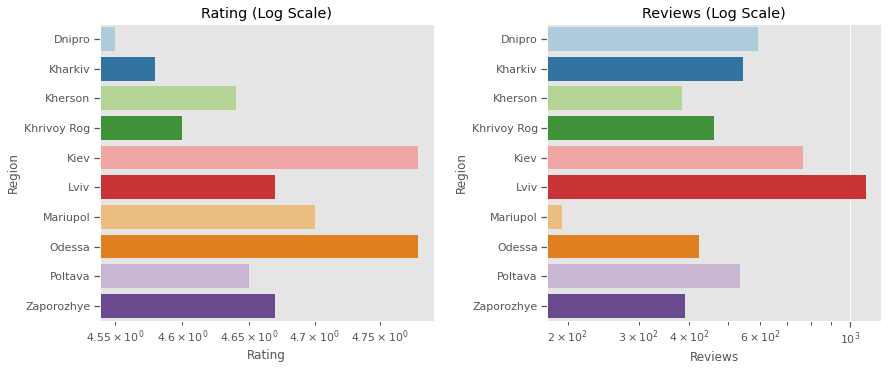

In [98]:
#plot the average ratings and reviews per region
plt.figure(figsize=(14,12))
plt.subplots_adjust(hspace=0.2, wspace=0.34)
sns.set_palette("Paired")
for i, group_col in enumerate(region_grouped.columns.to_list()):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=region_grouped[group_col], y=region_grouped.index, log=True)
    plt.title(group_col +' (Log Scale)')
    plt.xticks(rotation=0)
plt.show()

By looking at the average rating and reviews per region, they demonstrate that a high rating does not support high reviews for most regions. Only the shops in Kiev have a relatively high rating and high reviews.

# 4. Analysis

## 4.1 Elbow Method
This analysis chooses ratings and reviews for clustering because these numbers are the common metrics to evaluate marketing performance. Likewise, an Elbow method would help determine how many clusters are appropriate for the data.

In [99]:
#import the packages for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [100]:
#select Rating and Reviews columns
data_cluster = data_dropone[num_columns]
data_cluster

,Rating,Reviews
0,4.6,206
1,5.0,24
2,5.0,11
3,4.4,331
4,5.0,12
...,...,...
195,4.6,963
196,4.3,646
197,4.6,16
198,4.7,599


In [101]:
#standardize variables in these two colums
scaler=StandardScaler()
scaler.fit(data_cluster)
data_normalized = scaler.transform(data_cluster)
data_normalized = pd.DataFrame(data=data_normalized, columns=data_cluster.columns)
data_normalized.agg(['mean', 'std']).round()

,Rating,Reviews
mean,-0.0,-0.0
std,1.0,1.0


Standardization is required since the distributions of these two columns are skewed, as mentioned in the previous sections. Besides, a normal distribution would help K-means clustering get a better result.

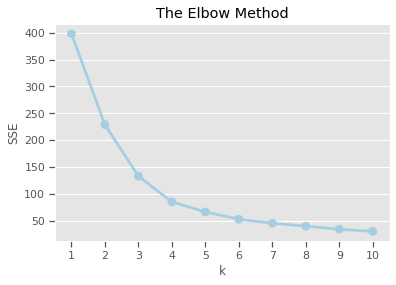

In [102]:
#find the elbow to determine the optimal number of clusters
sse={}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_

sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

It is more efficient to choose 3 or 4 clusters, as the plot shown. The sharpest angels are at 3 or 4. It means more than 4 clusters would not have much difference between clusters due to the slope. Thus, this analysis chooses 4 clusters to proceed with the clustering analysis.

## 4.2 K-means Clustering
K-Mean clustering groups entries by SSE (Sum of Squared Distance), which is a good method to sort items with similar characters.

In [103]:
#get the labels by K-means clustering and then attach the labels back to the data
kmeans = KMeans(n_clusters=4, random_state=44)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_

data_dropone = data_dropone.assign(cluster=cluster_labels)
data_dropone.sample(n=5)

,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option,cluster
126,Khrivoy Rog,"tea, coffee shop",coffee store,4.6,401,False,True,True,1
114,Lviv,svit kavy (rynok sq.),coffee shop,4.6,1284,False,True,True,0
164,Kharkiv,мастерская кофе,coffee shop,4.7,403,False,True,True,1
136,Khrivoy Rog,дикий койот кафе,cafe,4.9,116,True,True,True,3
81,Odessa,traveler`s coffee,coffee shop,4.6,2700,True,True,True,0


In [104]:
#review the number of entries in different clusters
data_dropone['cluster'].value_counts()

1    84
3    58
0    33
2    24
Name: cluster, dtype: int64

In [105]:
#review the average ratings and reviews in different clusters
data_comparison = data_dropone[['Rating', 'Reviews', 'cluster']].groupby('cluster').mean()
data_comparison


,Rating,Reviews
cluster,,
0,4.603030,1790.515152
1,4.628896,394.845238
2,4.262500,416.250000
3,4.913793,74.431034


In [106]:
#transform the numbers into proportions
rating_range = data_comparison['Rating'].max() - data_comparison['Rating'].min()
data_comparison['rating_prop'] = (data_comparison['Rating'] - data_comparison['Rating'].min()) / rating_range
review_range = data_comparison['Reviews'].max() - data_comparison['Reviews'].min()
data_comparison['review_prop'] = (data_comparison['Reviews'] - data_comparison['Reviews'].min()) / review_range
data_comparison

,Rating,Reviews,rating_prop,review_prop
cluster,,,,
0,4.603030,1790.515152,0.522853,1.000000
1,4.628896,394.845238,0.562567,0.186712
2,4.262500,416.250000,0.000000,0.199185
3,4.913793,74.431034,1.000000,0.000000


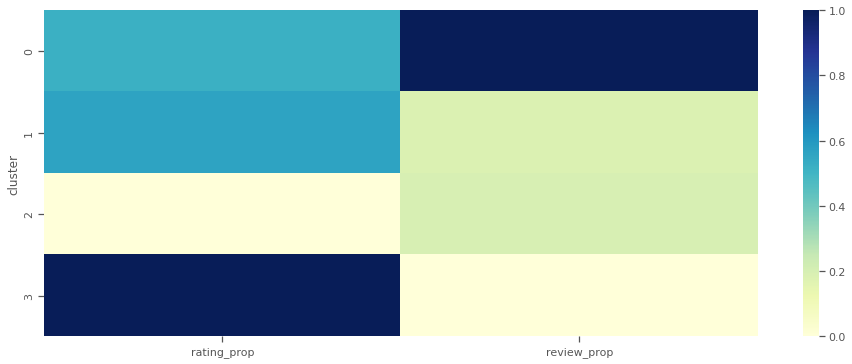

In [107]:
#heatmap to easily understand the value difference between clusters
plt.subplots(figsize=(16, 6))
sns.heatmap(data_comparison[['rating_prop', 'review_prop']], cmap = 'YlGnBu')
plt.show()

Here are the clustering results.

* Cluster 0 – Medium rating and high reviews
* Cluster 1 – Both medium rating and reviews
* Cluster 2 – Both low rating and reviews
* Cluster 3 – High rating with low reviews

Shops in cluster 0 have a medium ratings higher reviews. It tells the shops in this cluster have a better performance. so this analysis takes cluster 0 as an example to explore the traits of the shops.



In [108]:
#select the shops in cluster 3
cluster_0 = data_dropone[data_dropone['cluster']==0]
print('Number of Coffee Places in Cluster 0:', len(cluster_0))
cluster_0.head()

Number of Coffee Places in Cluster 0: 33


,Region,Place name,Place type,Rating,Reviews,Delivery option,Dine in option,Takeout option,cluster
20,Poltava,g coffee,coffee shop,4.5,1596,True,True,False,0
21,Poltava,kavun,coffee shop,4.7,1785,True,True,False,0
29,Poltava,dzhi,cafe,4.5,1195,True,True,True,0
34,Poltava,lviv handmade chocolate,chocolate shop,4.6,1376,False,True,True,0
42,Kherson,verona,european restaurant,4.5,1345,True,True,False,0


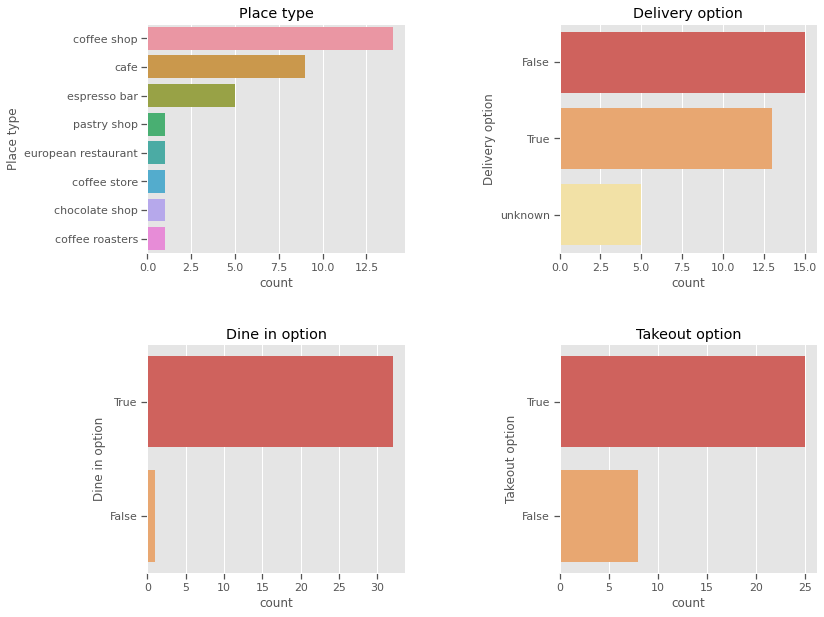

In [109]:
#plot the distributions in cluster 3
plt.figure(figsize=(12,16))
plt.subplots_adjust(hspace=0.4, wspace=0.6)
sns.set_palette("Spectral")
for i, cat_col in enumerate(cat_columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=cat_col, data=cluster_0, 
                  order=cluster_0[cat_col].value_counts().index)
    plt.title(cat_col)
    plt.xticks(rotation=0)
plt.show()

Here is the first view of the shop structure in cluster 0. It seems most shops in cluster 0 provide the same services as the previous exploratory analysis for all shops. The common type of the places in cluster 0 is a coffee shop. They do not provide a delivery service but have dine-in and takeout options. However, compared to the previous plot in the EDA section, we can notice that more shops in cluster 0 provide a delivery service, although they are still not the majority in this cluster. However, this analysis assumes that shops providing all services, which are delivery, dine-in, and take-out services, would have a higher possibility of getting higher ratings and reviews.


In [110]:
#get the percentage of the shops providing all services in cluster 3
deliver = cluster_0['Delivery option'] == True
dinein = cluster_0['Dine in option'] == True
takeout = cluster_0['Takeout option'] == True

all_service_0 = cluster_0[deliver & dinein & takeout]
prop_0 = len(all_service_0) / len(cluster_0)
print('{:.1%} of the Shops Provides All Services in Cluster 3.'.format(prop_0))

21.2% of the Shops Provides All Services in Cluster 3.


In [111]:
#get the percentage of the shops providing all services in cluster 1
cluster_1 = data_dropone[data_dropone['cluster']==1]
deliver = cluster_1['Delivery option'] == True
dinein = cluster_1['Dine in option'] == True
takeout = cluster_1['Takeout option'] == True

all_service_1 = cluster_1[deliver & dinein & takeout]
prop_1 = len(all_service_1) / len(cluster_1)
print('{:.1%} of the Shops Provides All Services in Cluster 1.'.format(prop_1))

10.7% of the Shops Provides All Services in Cluster 1.


In [112]:
#get the percentage of the shops providing all services in cluster 2
cluster_2 = data_dropone[data_dropone['cluster']==2]
deliver = cluster_2['Delivery option'] == True
dinein = cluster_2['Dine in option'] == True
takeout = cluster_2['Takeout option'] == True

all_service_2 = cluster_2[deliver & dinein & takeout]
prop_2 = len(all_service_2) / len(cluster_2)
print('{:.1%} of the Shops Provides All Services in Cluster 2.'.format(prop_2))

4.2% of the Shops Provides All Services in Cluster 2.


In [115]:
#get the percentage of the shops providing all services in cluster 3
cluster_3 = data_dropone[data_dropone['cluster']==3]
deliver = cluster_3['Delivery option'] == True
dinein = cluster_3['Dine in option'] == True
takeout = cluster_3['Takeout option'] == True

all_service_3 = cluster_3[deliver & dinein & takeout]
prop_3 = len(all_service_3) / len(cluster_3)
print('{:.1%} of the Shops Provides All Services in Cluster 3.'.format(prop_3))

8.6% of the Shops Provides All Services in Cluster 3.


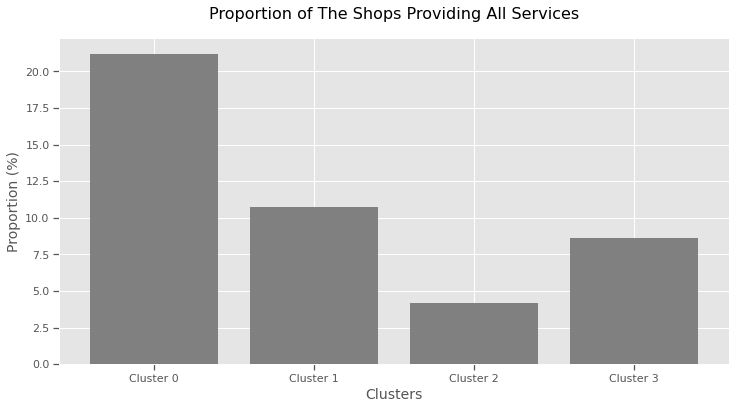

In [116]:
#plot the percentage of the shops providing all services in different clusters
plt.figure(figsize=(12,6))
cluster = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
proportion = [prop_0*100, prop_1*100, prop_2*100, prop_3*100]
plt.bar(cluster, proportion, color = 'grey')
plt.title('Proportion of The Shops Providing All Services', size=16, y=1.04)
plt.xlabel('Clusters', size=14)
plt.ylabel('Proportion (%)', size=14)
plt.show()

Take a look at the proportions of the shops providing all services in different clusters. It is obvious that a higher percentage, 21.2%, of shops in cluster 0 provides all services. It could be a concern for the next marketing plan.

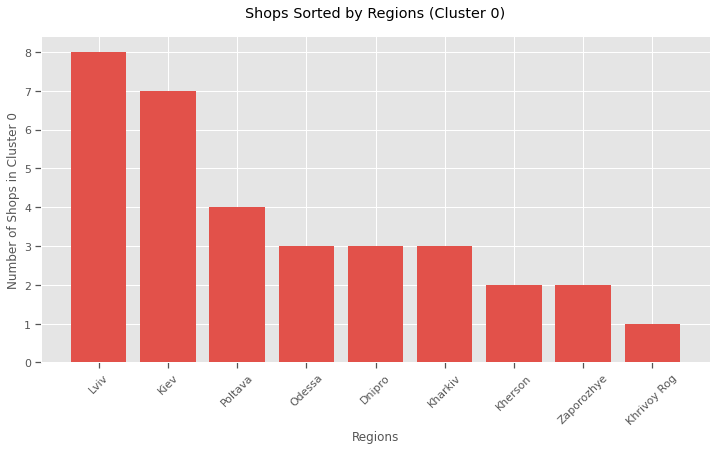

In [117]:
plt.figure(figsize=(12,6))
dict_0 = dict(cluster_0['Region'].value_counts())
plt.bar(list(dict_0.keys()), list(dict_0.values()))
plt.xticks(rotation=45)
plt.title('Shops Sorted by Regions (Cluster 0)', y=1.04)
plt.xlabel('Regions')
plt.ylabel('Number of Shops in Cluster 0')
plt.show()

Take a look at the locations of the shops in cluster 0. Lviv and Kiev are the regions where these coffee shops are.

# 5. Conclusion

This analysis uses an elbow method to get an optimal number of clusters for K-means clustering. Different clusters show different rating and review performance. The findings are as below.

4 clusters is an optimal number of clusters to well split the shops based on the rating and review performance.
* Cluster 0 – Medium rating and high reviews
* Cluster 1 – Both medium rating and reviews
* Cluster 2 – Both low rating and reviews
* Cluster 3 – High rating with low reviews

21.2% of shops provides all services, delivery, dine-in, and takeout options, in Cluster 0
Shops in Lviv and Kiev are the majority in Cluster 0
Lastly, here are suggestions for further analysis to explore more insights.

Complete the data
Since there are many missing values in this dataset, retrive the values would get a more accurate analysis.This
Take a closer look for all clusters
Explorre the characters of other clusters for further analysis since this analysis only focuses on the cluster 0.
different clustering methods
Use a hierarchical clustering method to group the shops and then cross-validate the results of different clustering methods.


# 6. Reccommendations
1. Compare with other markets
2. Merge demographic and geospatial data
3. Gather Google Trends and Google Ads data
4. Deeper Analysis of Segments
5. Target specific campaigns to each segment
6. Explore, if profitable, the opportunities we found here